## Spam Email Classifcation

Python Version: 3.11.4

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### data cleaning:

In [6]:
data=pd.read_csv('../DATA/spam.csv')
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
data['Spam']=data['Category'].apply(lambda x : 1 if x == 'spam' else 0)
data['Category']=data['Category'].apply(lambda x : 'real' if x == 'ham' else 'spam')
data.head()


,Category,Message,Spam
0,real,"Go until jurong point, crazy.. Available only ...",0
1,real,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,real,U dun say so early hor... U c already then say...,0
4,real,"Nah I don't think he goes to usf, he lives aro...",0


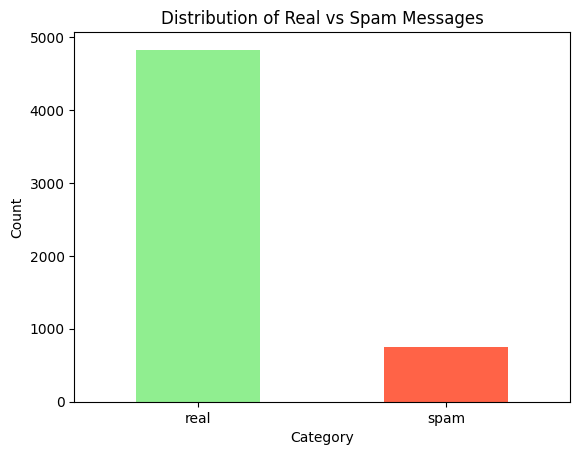

In [8]:
category_counts = data['Category'].value_counts()
category_counts.plot(kind='bar', color=['lightgreen', 'tomato'])
plt.title('Distribution of Real vs Spam Messages')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [9]:
data['Word_Count'] = data['Message'].apply(lambda x: len(x.split()))
avg_word_count = data.groupby('Category')['Word_Count'].mean()
data.head()

,Category,Message,Spam,Word_Count
0,real,"Go until jurong point, crazy.. Available only ...",0,20
1,real,Ok lar... Joking wif u oni...,0,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,28
3,real,U dun say so early hor... U c already then say...,0,11
4,real,"Nah I don't think he goes to usf, he lives aro...",0,13


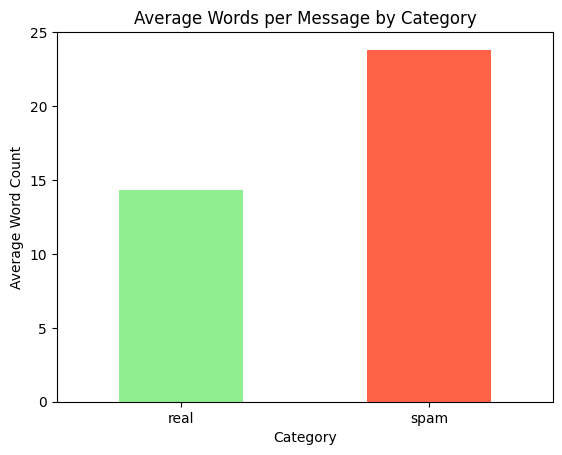

In [10]:
avg_word_count.plot(kind='bar', color=['lightgreen', 'tomato'])
plt.title('Average Words per Message by Category')
plt.xlabel('Category')
plt.ylabel('Average Word Count')
plt.xticks(rotation=0)  # Ensure the labels on x-axis are horizontal
plt.show()

In [11]:
from collections import Counter
import re

data=pd.read_csv('spam.csv')
spam_messages = data[data['Category'] == 'spam']['Message']
def clean_and_tokenize(text):
    text = re.sub(r'\W+', ' ', text)  # Remove non-word characters
    words = text.lower().split()  # Convert to lowercase and split into words
    return words

# Tokenize all spam messages and count word frequency
all_words = []
for message in spam_messages:
    all_words.extend(clean_and_tokenize(message))

word_counts = Counter(all_words)

# Get the top 10 most common words
top_20_words = word_counts.most_common(20)

# Separate words and their frequencies for plotting
words, frequencies = zip(*top_20_words)

# Create a bar chart
plt.figure(figsize=(8,6))
plt.bar(words, frequencies, color='tomato')
plt.title('Top 20 Most Frequently Used Words in Spam Texts')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'spam.csv'

In [53]:
duplicate_emails = len(data) - data['Message'].nunique()
print(len(data))
print(data['Message'].nunique())
print(duplicate_emails)


5572
5157
415


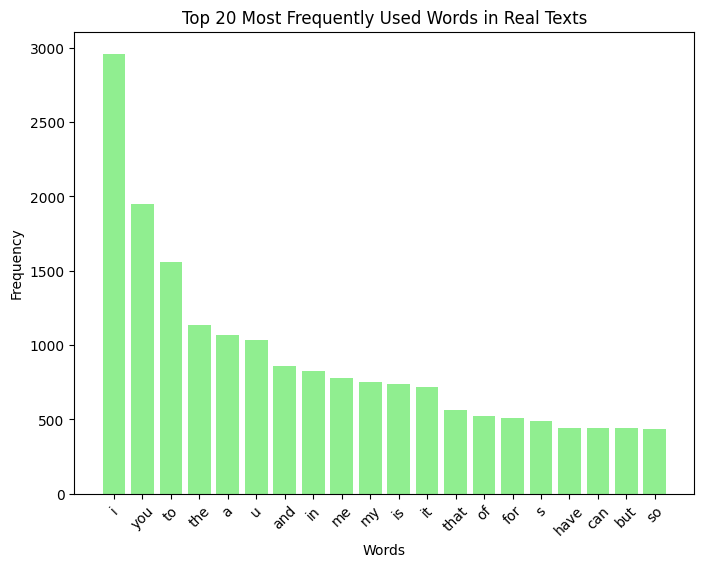

In [54]:
data=pd.read_csv('spam.csv')
messages = data[data['Category'] == 'ham']['Message']
def clean_and_tokenize(text):
    text = re.sub(r'\W+', ' ', text)  # Remove non-word characters
    words = text.lower().split()  # Convert to lowercase and split into words
    return words

# Tokenize all messages and count word frequency
all_words = []
for message in messages:
    all_words.extend(clean_and_tokenize(message))

word_counts = Counter(all_words)

# Get the top 10 most common words
top_20_words = word_counts.most_common(20)

# Separate words and their frequencies for plotting
words, frequencies = zip(*top_20_words)

# Create a bar chart
plt.figure(figsize=(8,6))
plt.bar(words, frequencies, color='lightgreen')
plt.title('Top 20 Most Frequently Used Words in Real Texts')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

In [55]:
category_counts = data['Category'].value_counts()

# Print the counts
print(f"Non-spam (ham) texts: {category_counts['ham']}")
print(f"Spam texts: {category_counts['spam']}")


Non-spam (ham) texts: 4825
Spam texts: 747
